In [129]:
# from google.colab import files
# uploaded = files.upload()

In [130]:
import pandas as pd
import io

df = pd.read_csv('Foodpanda Dataset.csv')
df

,customer_id,gender,age,city,signup_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,1,Male,Adult,Peshawar,1/14/2024,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,NaN,10/14/2024,Cancelled
1,2,Male,Adult,Multan,7/7/2024,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2.0,8/21/2025,Delayed
2,3,Other,Senior,Multan,6/20/2025,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3.0,9/19/2024,Delayed
3,4,Female,Senior,Peshawar,9/5/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2.0,6/29/2025,Delayed
4,5,Other,Senior,Lahore,12/29/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,NaN,3/6/2025,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,Male,Adult,Multan,11/25/2024,Pizza Hut,Burger,Italian,4,875.71,Cash,28,11/29/2024,166,Active,NaN,12/30/2024,Cancelled
5996,5997,Female,Adult,Islamabad,1/28/2025,KFC,Pizza,Italian,5,1118.26,Cash,12,6/8/2025,193,Inactive,3.0,2/9/2025,Delayed
5997,5998,Other,Teenager,Islamabad,10/19/2023,KFC,Sandwich,Italian,4,1005.83,Card,31,12/30/2024,278,Active,NaN,3/23/2025,Cancelled
5998,5999,Male,Adult,Islamabad,6/17/2024,KFC,Fries,Fast Food,4,1226.10,Card,37,12/27/2024,55,Inactive,2.0,3/15/2025,Delivered


In [131]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])
df['rating_date'] = pd.to_datetime(df['rating_date'])

In [132]:
df['last_order_date'] = pd.to_datetime(df['last_order_date'], errors='coerce')

latest_date = df['last_order_date'].max()
print("Latest last_order_date:", latest_date)

Latest last_order_date: 2025-08-21 00:00:00


In [133]:
df['time_difference'] = (df['last_order_date'] - df['signup_date']).dt.days
df['recency'] = (latest_date - df['last_order_date']).dt.days
df['member_duration'] = (latest_date - df['signup_date']).dt.days
df

,customer_id,gender,age,city,signup_date,restaurant_name,dish_name,category,quantity,price,...,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status,time_difference,recency,member_duration
0,1,Male,Adult,Peshawar,2024-01-14,McDonald's,Burger,Italian,5,1478.27,...,38,2025-07-19,238,Active,NaN,2024-10-14,Cancelled,552,33,585
1,2,Male,Adult,Multan,2024-07-07,KFC,Burger,Italian,3,956.04,...,24,2024-11-25,81,Active,2.0,2025-08-21,Delayed,141,269,410
2,3,Other,Senior,Multan,2025-06-20,Pizza Hut,Fries,Italian,2,882.51,...,42,2025-05-10,82,Inactive,3.0,2024-09-19,Delayed,-41,103,62
3,4,Female,Senior,Peshawar,2023-09-05,Subway,Pizza,Dessert,4,231.30,...,27,2025-07-24,45,Inactive,2.0,2025-06-29,Delayed,688,28,716
4,5,Other,Senior,Lahore,2023-12-29,KFC,Sandwich,Dessert,1,1156.69,...,35,2024-12-21,418,Inactive,NaN,2025-03-06,Cancelled,358,243,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,Male,Adult,Multan,2024-11-25,Pizza Hut,Burger,Italian,4,875.71,...,28,2024-11-29,166,Active,NaN,2024-12-30,Cancelled,4,265,269
5996,5997,Female,Adult,Islamabad,2025-01-28,KFC,Pizza,Italian,5,1118.26,...,12,2025-06-08,193,Inactive,3.0,2025-02-09,Delayed,131,74,205
5997,5998,Other,Teenager,Islamabad,2023-10-19,KFC,Sandwich,Italian,4,1005.83,...,31,2024-12-30,278,Active,NaN,2025-03-23,Cancelled,438,234,672
5998,5999,Male,Adult,Islamabad,2024-06-17,KFC,Fries,Fast Food,4,1226.10,...,37,2024-12-27,55,Inactive,2.0,2025-03-15,Delivered,193,237,430


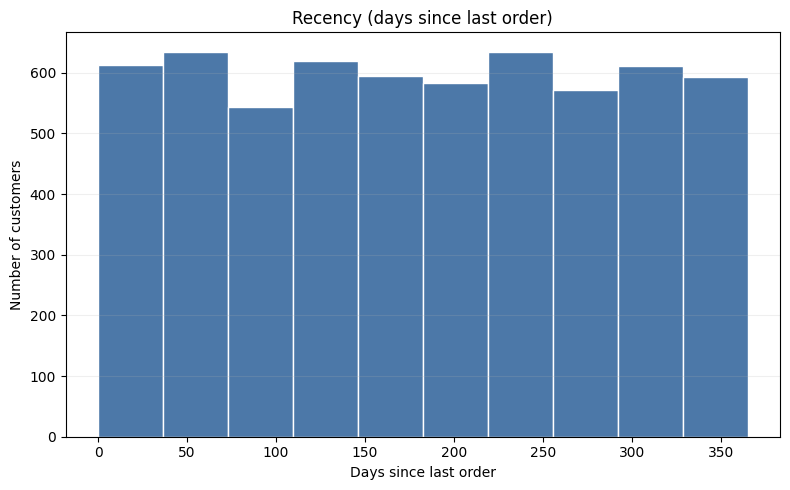

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['recency'].dropna(), bins=10, color='#4C78A8', edgecolor='white')
plt.title('Recency (days since last order)')
plt.xlabel('Days since last order')
plt.ylabel('Number of customers')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

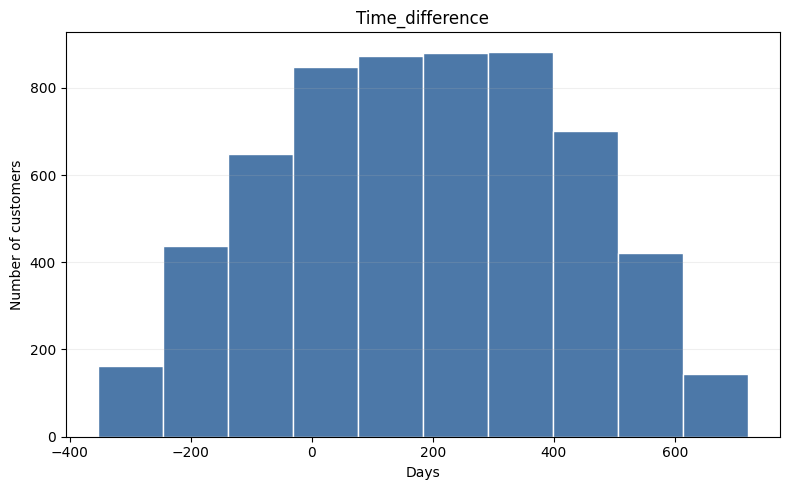

In [135]:
plt.figure(figsize=(8, 5))
plt.hist(df['time_difference'].dropna(), bins=10, color='#4C78A8', edgecolor='white')
plt.title('Time_difference')
plt.xlabel('Days')
plt.ylabel('Number of customers')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

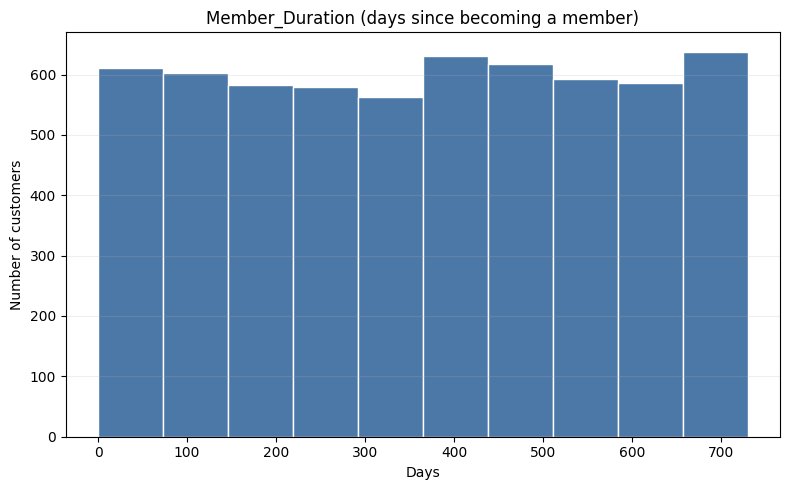

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['member_duration'].dropna(), bins=10, color='#4C78A8', edgecolor='white')
plt.title('Member_Duration (days since becoming a member)')
plt.xlabel('Days')
plt.ylabel('Number of customers')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

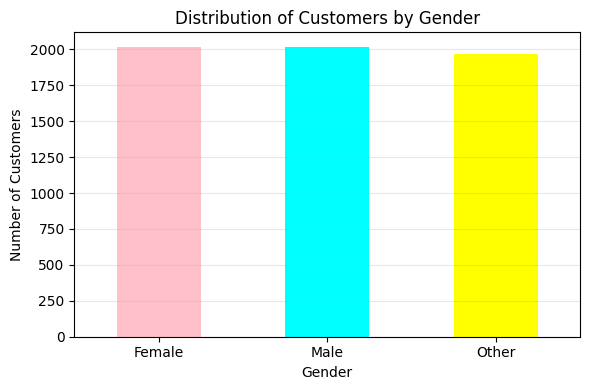

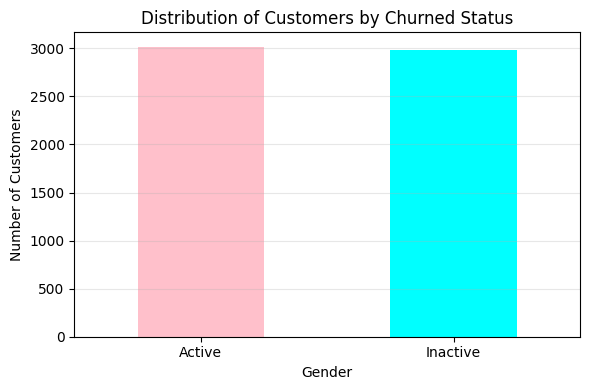

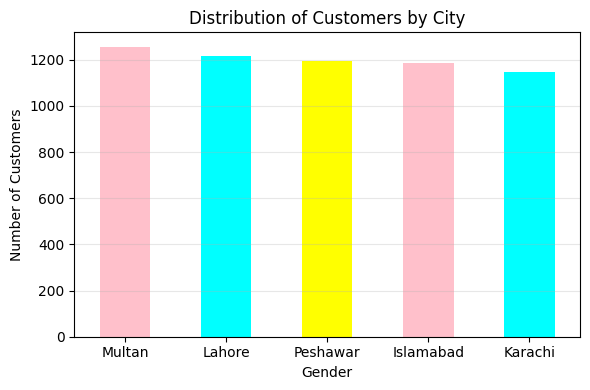

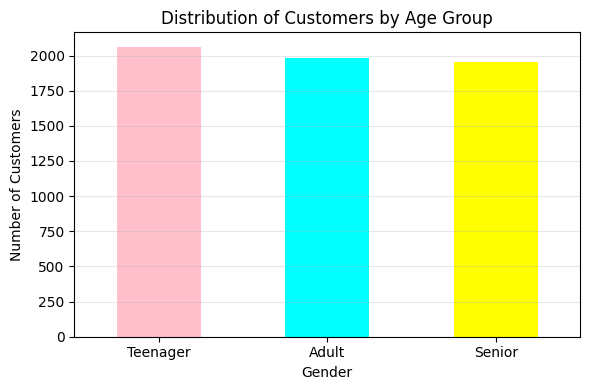

In [137]:
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind='bar', color=['pink', 'cyan', 'yellow'])
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
df['churned'].value_counts().plot(kind='bar', color=['pink', 'cyan'])
plt.title('Distribution of Customers by Churned Status')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
df['city'].value_counts().plot(kind='bar', color=['pink', 'cyan', 'yellow'])
plt.title('Distribution of Customers by City')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
df['age'].value_counts().plot(kind='bar', color=['pink', 'cyan', 'yellow'])
plt.title('Distribution of Customers by Age Group')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [138]:
df.describe()

,customer_id,signup_date,quantity,price,order_frequency,last_order_date,loyalty_points,rating,rating_date,time_difference,recency,member_duration
count,6000.000000,6000,6000.000000,6000.000000,6000.000000,6000,6000.000000,4032.000000,6000,6000.000000,6000.000000,6000.000000
mean,3000.500000,2024-08-19 12:06:43.199999744,2.991667,800.524880,25.304667,2025-02-20 07:55:55.200000,250.173667,3.012153,2025-02-18 12:47:59.999999744,184.825833,181.669500,366.495333
min,1.000000,2023-08-22 00:00:00,1.000000,100.300000,1.000000,2024-08-21 00:00:00,0.000000,1.000000,2024-08-21 00:00:00,-353.000000,0.000000,0.000000
25%,1500.750000,2024-02-21 00:00:00,2.000000,441.997500,13.000000,2024-11-21 00:00:00,125.000000,2.000000,2024-11-18 00:00:00,3.750000,89.000000,182.000000
50%,3000.500000,2024-08-15 00:00:00,3.000000,806.460000,25.000000,2025-02-20 00:00:00,249.500000,3.000000,2025-02-19 00:00:00,187.000000,182.000000,371.000000
75%,4500.250000,2025-02-20 00:00:00,4.000000,1149.737500,37.000000,2025-05-24 00:00:00,378.000000,4.000000,2025-05-22 00:00:00,369.000000,273.000000,547.000000
max,6000.000000,2025-08-21 00:00:00,5.000000,1499.950000,50.000000,2025-08-21 00:00:00,500.000000,5.000000,2025-08-21 00:00:00,720.000000,365.000000,730.000000
std,1732.195139,NaN,1.414778,404.855029,14.358930,NaN,144.608478,1.411615,NaN,236.159639,105.777429,212.119806


In [139]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [140]:
cleaned_df = df.drop('customer_id', axis=1)

In [141]:
binary = {
    'Inactive': 0,
    'Active': 1,
}

cleaned_df['churned'] = df['churned'].map(binary)

In [142]:
X = cleaned_df.drop('churned', axis=1)

X = X.drop(columns=['signup_date', 'last_order_date', 'rating_date', 'restaurant_name', 'dish_name'], errors='ignore')

X['rating'] = X['rating'].fillna(X['rating'].mean())
y = cleaned_df['churned']

In [143]:
x = pd.get_dummies(X, drop_first=True)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
log_regression_model = LogisticRegression(max_iter=1000, C = 1, penalty='l2', solver='lbfgs')
log_regression_model.fit(X_train_scaled, y_train)

y_pred_log = log_regression_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.495
Confusion Matrix:
 [[268 329]
 [277 326]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.45      0.47       597
           1       0.50      0.54      0.52       603

    accuracy                           0.49      1200
   macro avg       0.49      0.49      0.49      1200
weighted avg       0.49      0.49      0.49      1200



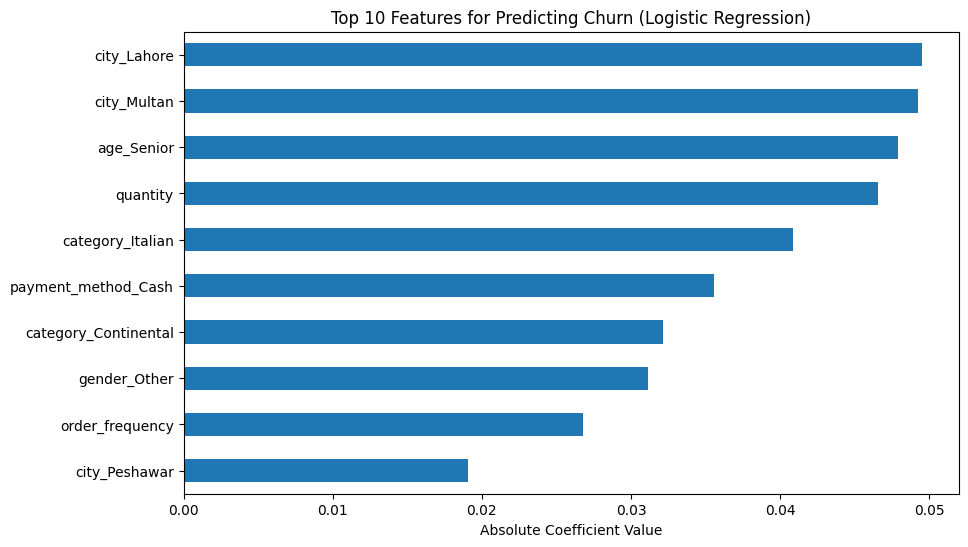

In [146]:
# Get feature importance
import numpy as np
import matplotlib.pyplot as plt

# Use absolute coefficients for Logistic Regression feature importance
importances = pd.Series(np.abs(log_regression_model.coef_[0]), index=x.columns)
importances = importances.sort_values(ascending=False)
# Sort and take top 10
top10 = importances.head(10)

# Plot
plt.figure(figsize=(10,6))
top10.plot(kind="barh") # horizontal bar chart looks cleaner
plt.title("Top 10 Features for Predicting Churn (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.gca().invert_yaxis() # so most important is at the top
plt.show()

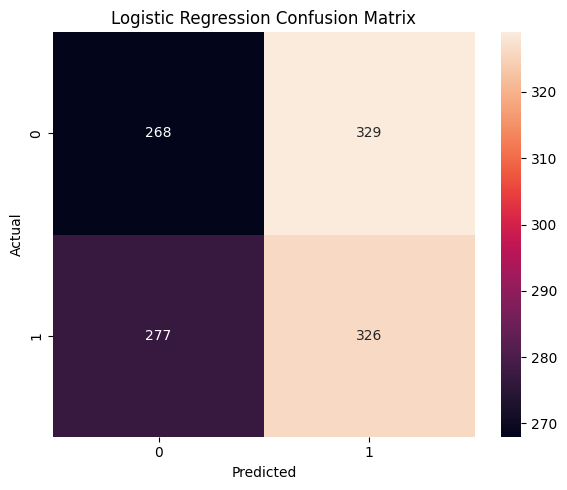

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

labels = np.unique(y_test)  # order by sorted unique labels
lcm = confusion_matrix(y_test, y_pred_log, labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(lcm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


=== Accuracy ===
0.5242

=== Confusion Matrix (rows=true, cols=pred) ===
        pred_0  pred_1
true_0     310     287
true_1     284     319

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.5219    0.5193    0.5206       597
           1     0.5264    0.5290    0.5277       603

    accuracy                         0.5242      1200
   macro avg     0.5241    0.5241    0.5241      1200
weighted avg     0.5242    0.5242    0.5242      1200


=== Top 15 Feature Importances (model-based) ===
                      feature  importance
1                       price    0.116996
3              loyalty_points    0.116694
6                     recency    0.112993
7             member_duration    0.111196
5             time_difference    0.111147
2             order_frequency    0.101051
4                      rating    0.046344
0                    quantity    0.046088
9                gender_Other    0.018182
11               age_Teenager

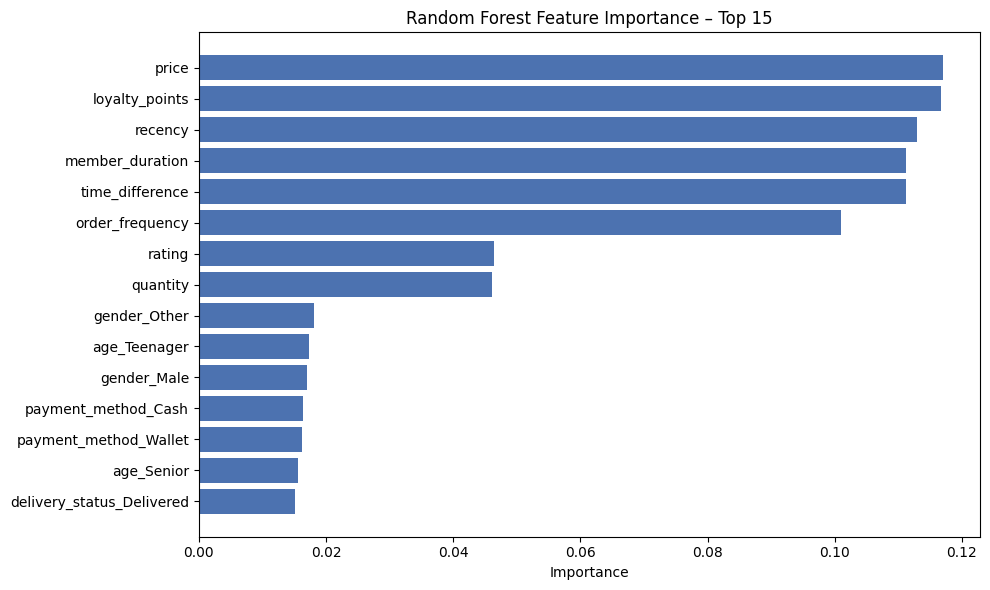

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# === Train Random Forest on your scaled features ===
rf = RandomForestClassifier(
    n_estimators=109,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight=None  # set to "balanced" if you have class imbalance
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# === Accuracy ===
acc = accuracy_score(y_test, y_pred)
print(f"\n=== Accuracy ===\n{acc:.4f}")

# === Confusion Matrix ===
labels = np.unique(y_test)  # order by sorted unique labels
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=[f"true_{l}" for l in labels], columns=[f"pred_{l}" for l in labels])
print("\n=== Confusion Matrix (rows=true, cols=pred) ===")
print(cm_df)

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# === Feature Importance ===
# If x is a DataFrame, we can use its column names. Otherwise, create generic names.
if hasattr(X_train, "columns"):
    feature_names = list(X_train.columns)
else:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

importances = rf.feature_importances_
fi_df = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values(
    "importance", ascending=False
)

print("\n=== Top 15 Feature Importances (model-based) ===")
print(fi_df.head(15))

# Save importances to CSV and plot
fi_df.to_csv("feature_importances.csv", index=False)

TOP_N = 15
plt.figure(figsize=(10, 6))
top = fi_df.head(TOP_N).iloc[::-1]  # reverse for descending barh
plt.barh(top["feature"], top["importance"], color="#4C72B0")
plt.xlabel("Importance")
plt.title(f"Random Forest Feature Importance – Top {TOP_N}")
plt.tight_layout()
plt.show()


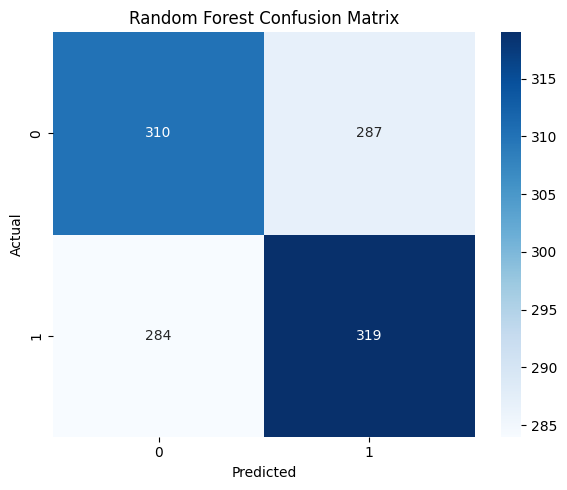

In [149]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()